<a href="https://colab.research.google.com/github/abhishek-548/ML-Projects/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#importing packages
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Knowing the versions 
print("Python version : {}".format(sys.version))
print("Numpy version : {}".format(np.__version__))
print("Pandas version : {}".format(pd.__version__))

Python version : 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
Numpy version : 1.19.5
Pandas version : 1.1.5


In [56]:
# importing packages
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [29]:
# Loading the datset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=["id","Clump_thickness","Uniform_Cell_Size","Uniform_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Size","Bare_Nuclei",
       "Bland_Chromatin","Normal_Nucleoli","Mistoses","Class"]
df = pd.read_csv(url,names=names)
df.head()

,id,Clump_thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mistoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [30]:
# replacing missing values
df.replace("?",-99999,inplace=True)

In [31]:
# knowing what label are present in data
df.columns

Index(['id', 'Clump_thickness', 'Uniform_Cell_Size', 'Uniform_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mistoses', 'Class'],
      dtype='object')

In [32]:
# Numer of rows and columns in dataset
df.shape

(699, 11)

In [36]:
# deleting the id column
df.drop(["id"],1,inplace=True)

In [37]:
df.shape

(699, 10)

In [38]:
df.loc[0]

Clump_thickness           5
Uniform_Cell_Size         1
Uniform_Cell_Shape        1
Marginal_Adhesion         1
Single_Epithelial_Size    2
Bare_Nuclei               1
Bland_Chromatin           3
Normal_Nucleoli           1
Mistoses                  1
Class                     2
Name: 0, dtype: object

In [44]:
for i in df:
  print(df[i].describe())

count    699.000000
mean       4.417740
std        2.815741
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Clump_thickness, dtype: float64
count    699.000000
mean       3.134478
std        3.051459
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Uniform_Cell_Size, dtype: float64
count    699.000000
mean       3.207439
std        2.971913
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Uniform_Cell_Shape, dtype: float64
count    699.000000
mean       2.806867
std        2.855379
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: Marginal_Adhesion, dtype: float64
count    699.000000
mean       3.216023
std        2.214300
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       10.000000
Name: Single_Epithelial_Size, dtype: floa

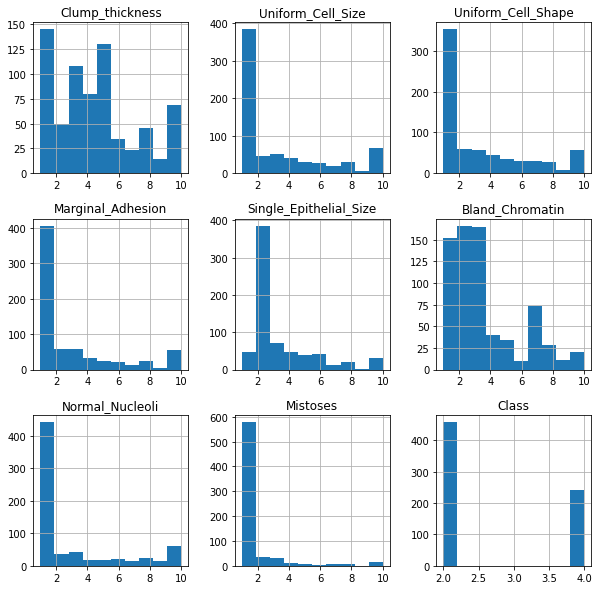

In [45]:
# plotting histogram for each variable
df.hist(figsize=(10,10))
plt.show()

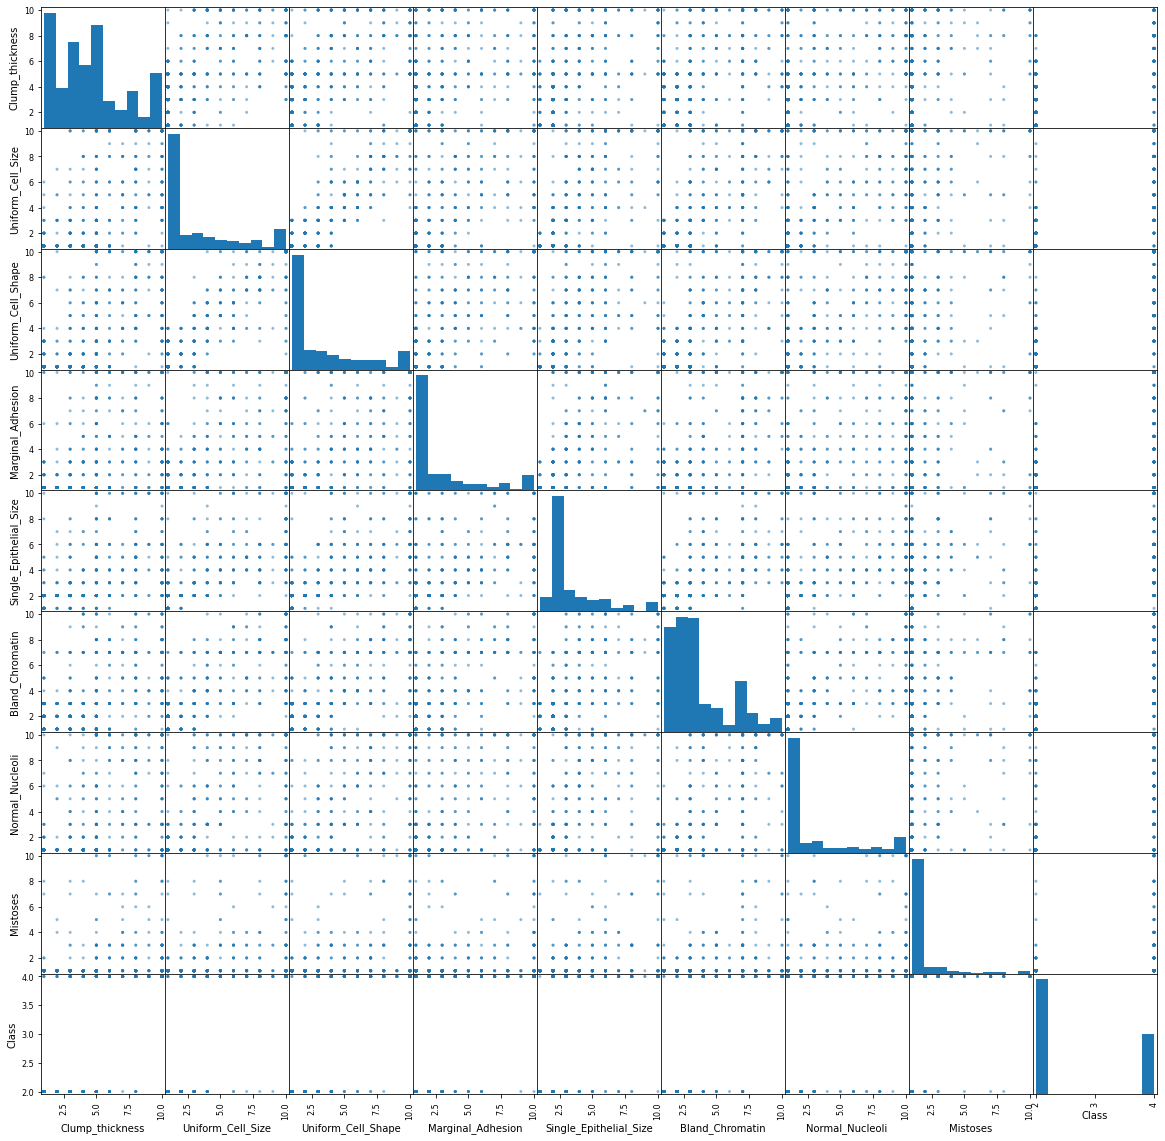

In [74]:
# creating scatter plot matrix
scatter_matrix(df,figsize=(20,20))
plt.show()

In [49]:
# preparing features and labels
x = np.array(df.drop(["Class"],1))
y = np.array(df["Class"])  

In [53]:
# Preparing training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [72]:
seed = 8
scoring = "accuracy"

In [55]:
# Describing what models we are using 
models = []
models.append(("KNN",KNeighborsClassifier(n_neighbors = 5)))
models.append(("SVM",SVC()))

In [58]:
results = []
names = []

In [73]:
# Using KFold Cross Validation
for name,model in models:
  kfold = KFold(n_splits = 10,random_state=seed,shuffle=True)
  cv_results = cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "{} : {} ({})".format(name,cv_results.mean(),cv_results.std())
  print(msg)

KNN : 0.9767532467532469 (0.01793677639313425)
SVM : 0.656461038961039 (0.06755235877138319)


In [75]:
# Predicting on test data
for name,model in models:
  model.fit(x_train,y_train)
  predictions = model.predict(x_test)
  print(accuracy_score(y_test,predictions))
  print(classification_report(y_test,predictions))

0.9642857142857143
              precision    recall  f1-score   support

           2       0.99      0.96      0.97        91
           4       0.92      0.98      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

0.65
              precision    recall  f1-score   support

           2       0.65      1.00      0.79        91
           4       0.00      0.00      0.00        49

    accuracy                           0.65       140
   macro avg       0.33      0.50      0.39       140
weighted avg       0.42      0.65      0.51       140



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
# predicting on unknow data given by us
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
ex = np.array([[4,2,1,1,10,2,3,10,10]])
ex = ex.reshape(len(ex),-1)
pred = model.predict(ex)
print(pred)

0.9642857142857143
[4]
